In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed
import pandas as pd
from mpl_toolkits import mplot3d

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,array,linspace,arange

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


<p style="padding-bottom:40%;"> </p>

# One-minute Review

A **scalar field** (e.g., $f(x,y)$) is a function of several variables. Its **domain** is the subset of input values in $\RR^n$; its **image** is the set of output values in $\RR$.

**Level sets** ("curves" for functions of 2 variables) are sets of input points associated to a particular output. For example, contour lines on a topographical map.

![Map of Adirondack region](https://www.nyroute28.com/maps/oldforgetopo.jpg)

<p style="padding-bottom:40%;"> </p>

# Lecture 08

  - Objectives

    - Explore limits and continuity of $f(x,y)$.
    - Define partial derivatives
    - Estimate partial derivatives from contour maps and tables.
  
  - Resources
    - Content
      - Stewart: §14.2—3
      - New Strang: [§4.2](https://cnx.org/contents/oxzXkyFi@5.30:2YObsFkq@7/4-2-Limits-and-Continuity)
      - [Slides](https://e2000.columbiajupyter2.org/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fdrewyoungren%2Fmvc-sp20&urlpath=tree%2Fmvc-sp20%2Fslide_notebooks%2Fmvc-L08.ipynb) via JupyterHub
    - Visualization
      - [CalcPlot3D](https://www.monroecc.edu/faculty/paulseeburger/calcnsf/CalcPlot3D/)
    - Practice
      - Mooculus: [Continuity](https://ximera.osu.edu/mooculus/calculus3/continuityOfFunctionsOfSeveralVariables/digInContinuity) [Partial Derivatives](https://ximera.osu.edu/mooculus/calculus3/partialDerivativesAndTheGradientVector/digInPartialDerivatives)
    - Extras
      - CalcBLUE: [Partial Derivatives](https://youtu.be/3QqfUIbQpfg)

<p style="padding-bottom:40%;"> </p>

# Limits

Consider a function $f:\RR^n \to \RR$ as mapping vectors to scalars. We write $$\lim_{\vec x \to \vec p} f(\vec x) = L$$ if $|f(\vec x) - L|$ can be made arbitrarily small by making $|\vec x - \vec p|$ sufficiently small. 

## Limits in $\RR^2$

Consider a function $f:\RR^2 \to \RR$ as mapping vectors to scalars. We write $$\lim_{(x,y) \to (a,b)} f(x,y) = L$$ if $|f(x,y) - L|$ can be made arbitrarily small by making $\sqrt{(x-a)^2+(y-b)^2}$ sufficiently small. 

### Examples

See [This screencast](https://youtu.be/EQUBHl3X7oU) for a few more/more detail. 

In [2]:
f = lambda x,y: (x**2 + y**2)
g = lambda x,y: x*y/(x**2 + y**2)
h = lambda x,y: x**3/(x**2 + y**2)


@interact
def _(lev=(0.01,1.,.01),prob={"1":[f,r"$z = x^2 + y^2$"],"2":[g,r"$z = \frac{xy}{x^2 + y^2}$"],
                              "3":[h,r"$z = \frac{x^3}{{x^2+ y^2}}$"]},angle=(-90,120,6),vangle=(0,90,6)):
    func,fs = prob
    fig = plt.figure(figsize = (12,6))
    ax = fig.add_subplot(121,projection='3d')
    ax.view_init(vangle,angle)
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    x = y = np.linspace(-1,1,400)
    X,Y = np.meshgrid(x,y)
    Z = func(X,Y)
#     ax.set_autoscale_on(True)
    ax.plot_surface(X,Y,Z,alpha=.7,cmap='viridis',rcount=75,ccount=75);
    k = np.max(Z)*(lev)+(1-lev)*np.min(Z)
    ax.contour(X,Y,Z,offset=k,levels=[k],colors=['red'])
    ax.set_title(fs)
    ax2 = fig.add_subplot(122)
    cp = ax2.contour(X,Y,Z,cmap='viridis');
    # fig.colorbar(cp); # for colorbar reference
    ax2.clabel(cp,fmt='%1.1f'); # inline countour labels.
    cp2 = ax2.contour(X,Y,Z,levels=[k],colors=['red'])
    ax2.clabel(cp2,fmt='%1.1f'); # inline counour labels.

interactive(children=(FloatSlider(value=0.5, description='lev', max=1.0, min=0.01, step=0.01), Dropdown(descri…

<p style="padding-bottom:40%;"> </p>

# Rates of Change

Limits went well. Let's try derivatives as a limit of a difference quotient. 

$$ \lim_{\langle x,y\rangle \to \langle a,b \rangle} \frac{f(x,y) - f(a,b)}{\langle x,y\rangle - \langle a,b \rangle}$$

# Blech!

**One cannot divide by vectors!**

<p style="padding-bottom:40%;"> </p>

## A sensible question

A group of hikers follows a curving path up a mountain ridge. How steep is their path at the halfway point?


In [3]:
f = lambda x,y: exp(-4*(y-sin(x))**2)*(1-np.abs(x+pi/2)/5)



@interact
def _(func=fixed(f),angle=(-90,120,6),vangle=(0,90,6)):
    fig = plt.figure(figsize = (12,6))
    ax = fig.add_subplot(111,projection='3d')
    ax.view_init(vangle,angle)
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    x =  np.linspace(-4,4,601)
    y =  np.linspace(-2,2,301)    
    X,Y = np.meshgrid(x,y)
    Z = func(X,Y)
    ax.plot_surface(X,Y,Z,alpha=.6,cmap='ocean',rcount=100,ccount=100);
    t = np.linspace(-pi/2,pi/2,100)
    X = t
    Y = t/pi - 1/2 - t*(t**2-pi**2/4)/5
    Z = func(X,Y)
    ax.plot(X,Y,Z,lw=6,color='r',alpha=1)

interactive(children=(IntSlider(value=12, description='angle', max=120, min=-90, step=6), IntSlider(value=42, …

<p style="padding-bottom:40%;"> </p>

# Partial Derivatives

We start by considering "one direction at a time".

The **partial derivative** of a function $f(x,y)$ with respect to $x$ at the point $(a,b)$ is $$f_x(a,b) = \lim_{h\to 0} \frac{f(a+h,b) - f(a,b)}{h}.$$


The **partial derivative** of a function $f(x,y)$ with respect to $y$ at the point $(a,b)$ is $$f_y(a,b) = \lim_{h\to 0} \frac{f(a,b+h) - f(a,b)}{h}.$$

In [4]:
f = lambda x,y: exp(-4*(y-sin(x))**2)*(1-np.abs(x+pi/2)/5)



@interact
def _(func=fixed(f),angle=(-90,120,6),vangle=(0,90,6),var=['x','y']):
    fig = plt.figure(figsize = (12,6))
    ax = fig.add_subplot(111,projection='3d')
    ax.view_init(vangle,angle)
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    x =  np.linspace(-4,4,601)
    y =  np.linspace(-2,2,301)    
    X,Y = np.meshgrid(x,y)
    Z = func(X,Y)
    ax.plot_surface(X,Y,Z,alpha=.6,cmap='ocean',rcount=100,ccount=100);
    t = np.linspace(-pi,pi,100)
    X = t
    Y = np.zeros_like(X)
    if var == 'y':
        X,Y = Y,X
    ax.set_xlim([-4,4])
    ax.set_ylim([-2,2])
    Z = func(X,Y)
    ax.plot(X,Y,Z,lw=6,color='r',alpha=1)
    

interactive(children=(IntSlider(value=12, description='angle', max=120, min=-90, step=6), IntSlider(value=42, …


##### Other notation

All of these are equivalent. 

$$f_x = \frac{\partial f}{\partial x} = \partial_x f = f^{(1,0)}$$

and there are many more. 

<p style="padding-bottom:40%;"> </p>

### Computing $\frac{\partial f}{\partial x}$

In practice, we compute partial derivatives by **treating all variables except the variable in question as constant**.

#### Example

Compute:

  1. $\displaystyle \frac{\partial}{\partial x} \left( x^2y - \sin(x-2y) \right)$

  2. $\displaystyle \frac{\partial}{\partial y} \left( x^2y - \sin(x-2y) \right)$

  3. $\displaystyle \frac{\partial}{\partial z} \left( \frac{z^2 \tan^{-1}(\sqrt{x^2+1})}{\cosh(xy)} \right)$

<p style="padding-bottom:40%;"> </p>

# Higher Order Derivatives

Since the partial derivative of a function is a function, we can iterate the process. 

$$f_{xx} = \frac{\partial^2 f}{\partial x^2}$$
$$f_{xy} = \frac{\partial^2 f}{\partial y \partial x}$$

etc.

<p style="padding-bottom:40%;"> </p>

## Interpretation 

The case of a second derivative of a single variable easily relates to the one-variable case and the concept of **concavity**. A function $f$ for which $f_{xx} > 0$ is said to be "concave up in the $x$-direction". 

### Example: Heat Equation

The temperature at time $t$ at position $x$ along a straight bar is given by a function $u(t,x)$. The evolution of the temperature distribution is governed by the **heat equation** $$u_t = u_{xx}.$$
This is a **partial differential equation** or **PDE**, but don't let it intimidate you. 

One could interpret this equation as stating, "Where the temperature distribution is concave down, the bar will cool; where it is concave up, the bar will warm."

In [10]:
u = lambda x,t: exp(-x**2/t)/sqrt(2*pi*t)
@interact(t=(.1,7))
def _(t=.1):
    x = np.linspace(-3,3,100)
    plt.plot(x,u(x,t)+u(x-2,t+1/2),color='k',lw=3)
    plt.ylim([0,1.5])
    plt.ylabel("temp")
    plt.xlabel("position")
    y = np.linspace(0,1.5,10)
    x,y= np.meshgrid(x,y)
    plt.pcolormesh(x,y,u(x,t)+u(x-2,t+1/2),vmin=0,vmax=.6,cmap='rainbow',shading='auto')

interactive(children=(FloatSlider(value=0.1, description='t', max=7.0, min=0.1), Output()), _dom_classes=('wid…

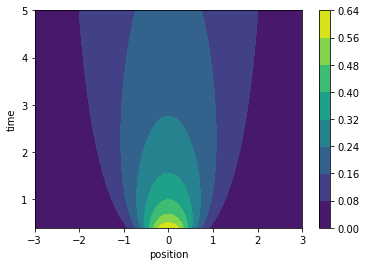

In [6]:
u = lambda x,t: exp(-x**2/t)/sqrt(2*pi*t)

x = np.linspace(-3,3,100)
t = np.linspace(.4,5,150)
x,t = np.meshgrid(x,t)
plt.contourf(x,t,u(x,t));
plt.ylabel("time")
plt.colorbar()
plt.xlabel("position");

<p style="padding-bottom:40%;"> </p>

## Mixed partials

A quantity like $\frac{\partial^2 f}{\partial x \partial y}$ is a little harder to wrap ones head around. 

Compute all mixed partials of the following funtions:
  
  1. $f(x,y) = xy^3 - y \sin x$
  2. $r(x,t) = \frac{x}{x+t}$
  2. $u(p,q) = e^{-p\sqrt{q}}$
      

<p style="padding-bottom:40%;"> </p>

## Clairaut's Theorem

If all mixed partials of a function $f$ exist and are continuous in a neighborhood of a point, then $$ \frac{\partial^2 f}{\partial x \partial y} = \frac{\partial^2 f}{\partial y \partial x}.$$

Here is a quick illustration justifying Clairaut's Theorem. 

Suppose you connect 4 points in space, each at a different height and directly over the corner of a square (side length $\Delta s$). 

### Exercise
Compute the **differences of the slopes** on opposite sides of the square,

In [7]:
@interact
def _(angle=(-90,120,6),vangle=(0,90,6),b=(.5,4.5)):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111,projection='3d')
    ax.view_init(vangle,angle)
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)

    ax.plot([0,0,1,1,0],[0,1,1,0,0],[2,1,3,b,2],'r')
    ax.set_xlim([-.1,1.1])
    ax.set_ylim([-.1,1.1])
    ax.set_zlim([0,5])
    x = y = np.linspace(-.1,1.1,60)
    x,y=np.meshgrid(x,y)
    ax.plot_surface(x,y,(1-y)*((1-x)*2+b*x) + y*((1-x)+3*x),alpha=.5,cmap="viridis")
    ax.text(1,0,b+.2,"$B$",fontsize=14)
    ax.text(0,0,2+.2,"$A$",fontsize=14)
    ax.text(0,1,1+.2,"$C$",fontsize=14)
    ax.text(1,1,3+.2,"$D$",fontsize=14)



interactive(children=(IntSlider(value=12, description='angle', max=120, min=-90, step=6), IntSlider(value=42, …

#### Quick exercise

Compute $g_{zzxw}$ for $$g(w,x,y,z)= w^2 x^3 y z^2+\sin \left(\frac{x y}{z^2}\right).$$

<p style="padding-bottom:40%;"> </p>

### Example 

Here is countour plot for hours of daylight as a function of latitude and day of year. Here are some questions we can ask. 

  - When is length-of-day increasing fastest in New York?
  - How much less daylight do you get by moving a degree north from Irkutsk on Halloween?
  - Where and when does heading south gain you the most daylight?

![Daylight as a function of latitude and time of year](https://upload.wikimedia.org/wikipedia/commons/e/e1/Hours_of_daylight_vs_latitude_vs_day_of_year_cmglee.svg)

<p style="padding-bottom:40%;"> </p>

### Example

Below is a contour plot of a function $f(x,y)$. Estimate the partial derivatives $\frac{\partial f}{\partial x}$ and $\frac{\partial f}{\partial y}$ at each labeled point. 

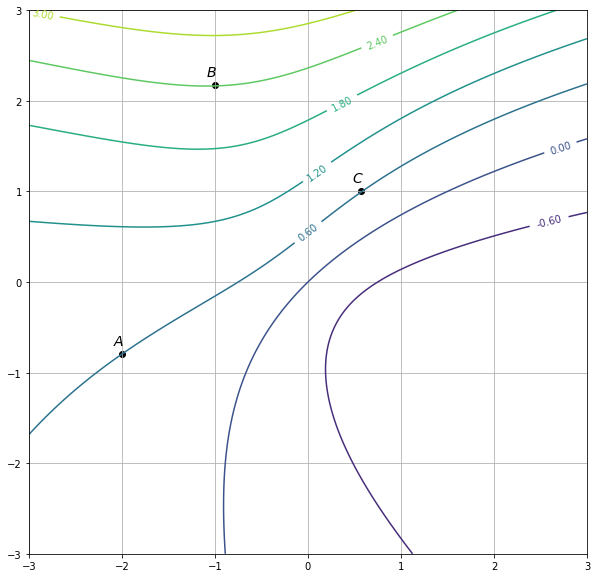

In [8]:
X = Y = np.linspace(-3,3,400)
X,Y = np.meshgrid(X,Y)
Z = (1.5**Y*Y - X) / sqrt(X**2 + Y**2 + 1)
plt.figure(figsize=(10,10))
cs = plt.contour(X,Y,Z)
pts=np.column_stack([[-2,-.8],[-1,2.17],[.57,1]])
plt.scatter(pts[0],pts[1],color='k')
for i,ch in enumerate("ABC"):
    plt.text(pts[0,i]-.1,pts[1,i]+.1,"${}$".format(ch),fontsize=14)
plt.grid(True)
plt.clabel(cs,fmt="%1.2f");

Does this make your estimates more or less accurate?

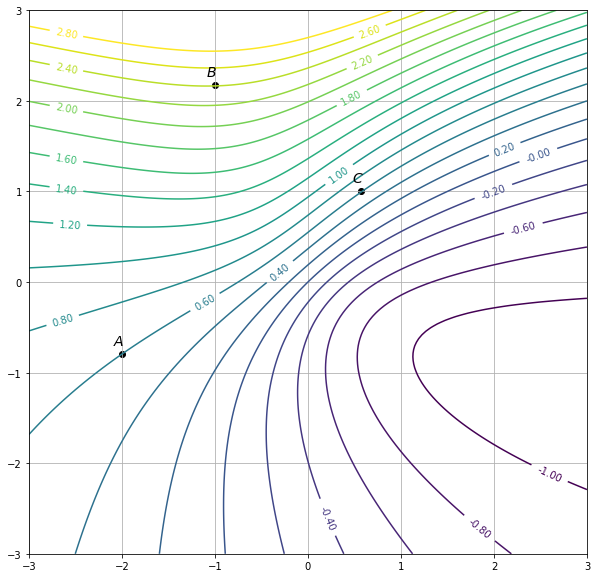

In [9]:
X = Y = np.linspace(-3,3,150)
X,Y = np.meshgrid(X,Y)
Z = (1.5**Y*Y - X) / sqrt(X**2 + Y**2 + 1)
plt.figure(figsize=(10,10))
pts=np.column_stack([[-2,-.8],[-1,2.17],[.57,1]])
plt.grid(True,'both')
for i,ch in enumerate("ABC"):
    plt.text(pts[0,i]-.1,pts[1,i]+.1,"${}$".format(ch),fontsize=14)
cs = plt.contour(X,Y,Z,levels=np.arange(-1,3,.2))
plt.scatter(pts[0],pts[1],color='k')
plt.clabel(cs,fmt="%1.2f");